In [168]:
#import libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [169]:
#read data

api_df = pd.read_csv('C:/Users/jeffr/Documents/MTA Info/mta_311_12_26_14_dummies.csv',low_memory=False)

In [170]:
#check dataframe

api_df.head()

,latitude,longitude,late,created_date_day_of_week,agency_DFTA,agency_DHS,agency_DOE,agency_DOF,agency_DOHMH,agency_DOITT,...,Complaint Grouping_Traffic,Complaint Grouping_Water,open_data_channel_type_MOBILE,open_data_channel_type_ONLINE,open_data_channel_type_OTHER,open_data_channel_type_PHONE,open_data_channel_type_UNKNOWN,Location_Type_Grouping_Business,Location_Type_Grouping_Public,Location_Type_Grouping_Residential
0,40.734426,-73.987714,False,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,40.718309,-73.985476,False,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,40.861550,-73.926897,False,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,40.721488,-73.995115,False,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,40.620056,-73.940781,False,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0


In [171]:
#convert to boolean

api_df['late'] =api_df['late']*1

In [172]:
#check new column

api_df['late'].describe()

count    16587.000000
mean         0.163622
std          0.369943
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: late, dtype: float64

In [173]:
#Set target variable

y = api_df.pop('late')

In [174]:
#Set features

X = api_df

In [175]:
#split dataset into train and test sets

X_train, X_test , y_train, y_test = train_test_split(X,y, test_size = .5, random_state = 2)

In [176]:
#Verify shapes

print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (8293, 37)
Training Labels Shape: (8293,)
Testing Features Shape: (8294, 37)
Testing Labels Shape: (8294,)


In [177]:
#define regressor

random_forest = RandomForestRegressor()

In [178]:
#fit model

random_forest.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [179]:
#Score of model

random_forest.score(X_test,y_test)

0.26762352648483345

In [180]:
#predictions

predictions = random_forest.predict(X_test)

In [181]:
#errors

errors = abs(predictions - y_test)

In [182]:
print('Metrics for Random Forest Trained on Training Data')
print('Average absolute error:', round(np.mean(errors), 2), 'degrees.')

Metrics for Random Forest Trained on Training Data
Average absolute error: 0.18 degrees.


In [183]:
#examine features

RF_features = random_forest.feature_importances_

In [184]:
#indices of RF

RF_indices = np.argsort(RF_features)[::-1]

In [185]:
#names of columns

RF_names = X_test.columns

In [186]:
#Coefficients of features ranked by importance

RF_names[RF_indices][:10]
RF_features[RF_indices][:10]

array([0.2761257 , 0.26013292, 0.09582357, 0.08157521, 0.08075695,
       0.04159884, 0.02984156, 0.01857144, 0.01258716, 0.01211307])

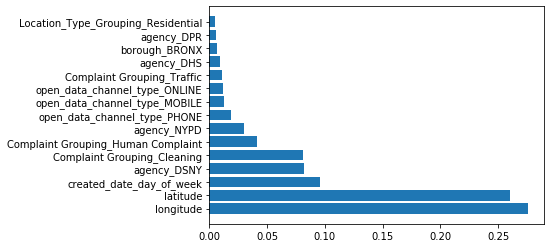

In [187]:
#look at graph of features by importance

plt.barh(RF_names[RF_indices][:15],RF_features[RF_indices][:15]);

In [188]:
#Recursive Feature Elimination for Logistic Regression Model

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(X,y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

[False False False  True False False  True  True  True  True  True  True
  True  True  True  True False False False  True  True  True  True  True
 False  True  True False False False False  True False False  True False
 False]
[16 17 15  1  3  4  1  1  1  1  1  1  1  1  1  1  6  7 14  1  1  1  1  1
  5  1  1 12  2 13 11  1 10  8  1  9 18]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [189]:
X.columns

Index(['latitude', 'longitude', 'created_date_day_of_week', 'agency_DFTA',
       'agency_DHS', 'agency_DOE', 'agency_DOF', 'agency_DOHMH',
       'agency_DOITT', 'agency_DOT', 'agency_DPR', 'agency_DSNY', 'agency_EDC',
       'agency_NYPD', 'agency_TLC', 'borough_BRONX', 'borough_BROOKLYN',
       'borough_MANHATTAN', 'borough_QUEENS', 'borough_STATEN ISLAND',
       'borough_Unspecified', 'Complaint Grouping_Animal',
       'Complaint Grouping_Cleaning', 'Complaint Grouping_Human Complaint',
       'Complaint Grouping_Maintenance', 'Complaint Grouping_Noise',
       'Complaint Grouping_Plants', 'Complaint Grouping_Traffic',
       'Complaint Grouping_Water', 'open_data_channel_type_MOBILE',
       'open_data_channel_type_ONLINE', 'open_data_channel_type_OTHER',
       'open_data_channel_type_PHONE', 'open_data_channel_type_UNKNOWN',
       'Location_Type_Grouping_Business', 'Location_Type_Grouping_Public',
       'Location_Type_Grouping_Residential'],
      dtype='object')

In [190]:
cols=['agency_DFTA','agency_DOF', 'agency_DOHMH',
       'agency_DOITT', 'agency_DOT', 'agency_DPR', 'agency_DSNY', 'agency_EDC',
       'agency_NYPD', 'agency_TLC','borough_BRONX', 'borough_STATEN ISLAND',
       'borough_Unspecified', 'Complaint Grouping_Animal',
       'Complaint Grouping_Cleaning','Complaint Grouping_Human Complaint','Complaint Grouping_Noise',
       'Complaint Grouping_Plants','open_data_channel_type_OTHER',  'Location_Type_Grouping_Business']

In [191]:
#Features selected by RFE
X=api_df[cols]

In [192]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [193]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.87


In [194]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[6850   55]
 [1058  331]]


In [195]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.99      0.92      6905
           1       0.86      0.24      0.37      1389

    accuracy                           0.87      8294
   macro avg       0.86      0.62      0.65      8294
weighted avg       0.86      0.87      0.83      8294



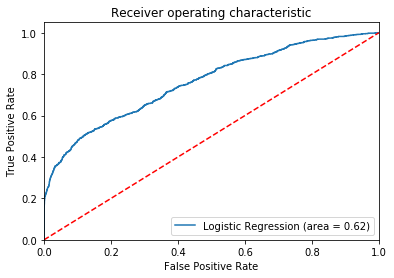

In [196]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [197]:
from sklearn.metrics import precision_recall_curve

#precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
print(precision, recall)

[0.16747046 0.85751295 1.        ] [1.         0.23830094 0.        ]


In [198]:
from sklearn.metrics import f1_score

#F1 score
f1 = f1_score(y_test, y_pred)
print(f1)

0.3729577464788733


In [202]:
from sklearn.metrics import auc

#precision-recall AUC
auc = auc(recall, precision)
print(auc)

0.6116879911861681


Logistic: f1=0.373 auc=0.612


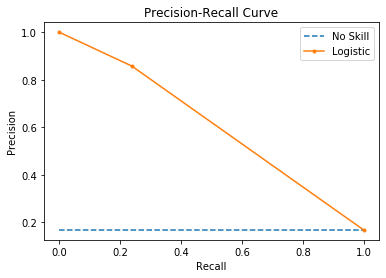

In [203]:
# precision-recall curve and f1
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
# predict class values
yhat = logreg.predict(X_test)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, y_pred)
lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
#title
plt.title('Precision-Recall Curve')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()